# **LANGUAGE-IDENTIFICATION CLASSIFFICATION HACKATHON**

**Overview**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

**AIM**

Is to take text which is in any of South Africa's 11 Official languages and predict which language the text is in, using NLP.

## TABLE OF CONTENTS
1. Importing Libraries
2. Loading of data sets
3. Exploratory Data Analysis
4. Preprocessing/ Cleaning of Data
5. Training and Evaluation of the models
6. Model Comparison
7. Submission
8. Conclusion

### Import  Libraries

In [7]:
# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import re
from sklearn.pipeline import Pipeline
from nltk.tokenize import sent_tokenize


# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


# Hyperparameter tunning methods
from sklearn.model_selection import GridSearchCV

# metrics

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

%matplotlib inline

# Warnings

import warnings
warnings.filterwarnings("ignore")
#Setting Plot figure size
sns.set(rc={'figure.figsize':(12.8,11.27)})

## Load and view data sets

In [8]:
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

In [9]:
#creating a copy of the data
train_set = train.copy()
test_set = test.copy()

In [10]:
train_set.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [12]:
test_set.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### EDA

In [13]:
train_set.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


#### Train Information

In [14]:
test_set .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


test_set has 33000 entries, has only 2 columns, doesn't have any missing values and one data 'obj' type  

#### Value Count

In [15]:
train_set['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

#### Checking for unique values

In [16]:
train_set['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

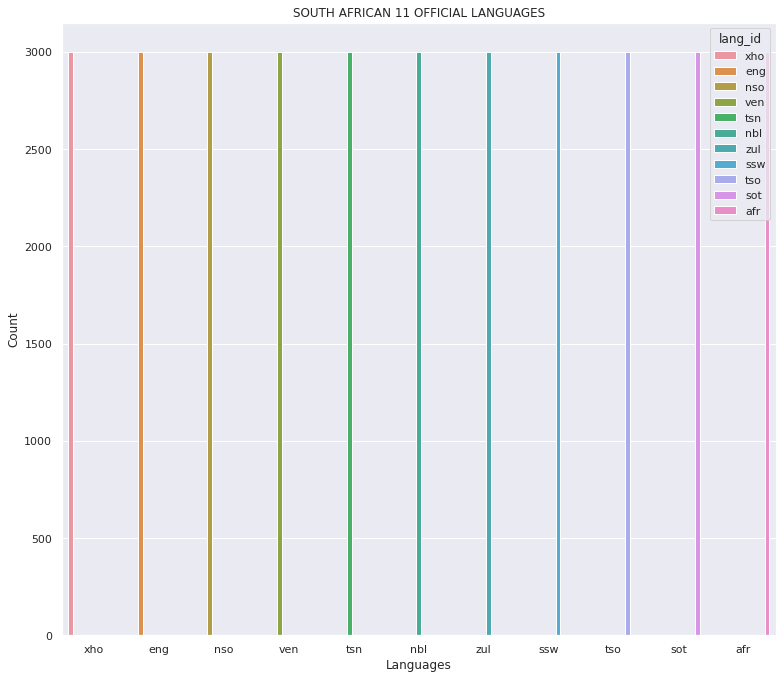

In [17]:
sns.countplot(x="lang_id", hue="lang_id",data=train_set,
              order=train_set.lang_id.value_counts().iloc[:20].index) 
plt.ylabel('Count')
plt.xlabel('Languages')
plt.title('SOUTH AFRICAN 11 OFFICIAL LANGUAGES')
plt.show()

## Data Preprocessing

Converting all text to lowercase data

In [18]:
train_set['text'] = train_set['text'].str.lower()
test_set['text'] = test_set['text'].str.lower()

#### Removing punctuations

In [19]:
def removing_punctuations(data):
    """This function take a string/list as an input and removes all the punctuations"""

    words = str.maketrans('', '', string.punctuation)
    return data.translate(words)  
train_set['text'] = train_set['text'].apply(lambda x: removing_punctuations(x))
test_set['text'] = test_set['text'].apply(lambda x: removing_punctuations(x))

#### Data Cleaning

In [20]:
def removing_URL(data):
    return re.sub(r"http\S+", "", data) 
def removing_repeating_char(data):
    return re.sub(r'(.)1+', r'1', data)
def removing_numbers(data):
    return re.sub('[0-9]+', '', data)
def remove_other(data):
    
    data = re.sub('\[.*?\]', '', data)
    data = re.sub('<.*?>+', '', data)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', data)
    data = re.sub('\n', '', data)
    data = re.sub('\w*\d\w*', '', data)
    
    return data
def clean_data(tokenized_text):
    """Clean each word from list of tokenized text"""
    tokenized_text = removing_URL(tokenized_text)
    tokenized_text = removing_repeating_char(tokenized_text)
    tokenized_text = removing_numbers(tokenized_text)
    tokenized_text = remove_other(tokenized_text)
    return tokenized_text

In [21]:
train_set['text'] = train_set['text'].apply(lambda x: clean_data(x))
test_set['text'] = test_set['text'].apply(lambda x: clean_data(x))

In [22]:
test_set.head(10)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
5,6,ke feela dilense tše hlakilego tša pono e tee ...
6,7,fn am final gems birthing optionszulutxtfn
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,so on occasion are statistics misused


## Splitting the Data

In [23]:
# Setting the X and y variables 
X = train['text']
y = train['lang_id']

In [24]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (26400,)
Size of test set: (6600,)


## Training and Evaluation

### Logistic Regression

In [25]:
# Create pipeline for Logistic Regression:
LR = Pipeline([('tfidf', TfidfVectorizer()),('lr', LogisticRegression()),])

# Model Generation Using Logitic Regression
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)

# Classification report
print(classification_report(y_test, pred_lr))
LR_metrics = classification_report(y_test, pred_lr)

# getting accuracy using the  accuracy_score function
LR_Acc = round(accuracy_score(pred_lr, y_test)*100, 2)
print("Logistic Regression Accuracy Score: ", LR_Acc)
LR_F1 = round(f1_score(pred_lr, y_test, average="macro")*100, 2)
print("F1 Score: ",LR_F1 )

              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600

Logistic Regression Accuracy Score:  99.47
F1 Score:  99.46


### Linear Support Vector Classifier

In [26]:
# Create pipeline for Linear SVC:
LSVC = Pipeline([('LSVC_tfidf', TfidfVectorizer()),('LSVC_clf', LinearSVC())])

# Model Generation Using Linear SVC
LSVC.fit(X_train, y_train)
pred_LSVC = LSVC.predict(X_test)

# Classification report
print(classification_report(y_test, pred_LSVC))
LSVC_metrics = classification_report(y_test, pred_LSVC)

# Use accuracy_score function to get the accuracy
LSVC_Acc = round(accuracy_score(pred_LSVC, y_test)*100, 2)
print("Linear SVC Accuracy Score: ",LSVC_Acc)
LSVC_F1 = round(f1_score(pred_LSVC, y_test, average="macro")*100, 2)
print("F1 Score: ", LSVC_F1)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

Linear SVC Accuracy Score:  99.71
F1 Score:  99.71


### Naive Bayes Multinomial

In [27]:
# pipeline for Naive Bayes Multinomial
NBM = Pipeline([('tfidf_CLF', TfidfVectorizer()),('NBM_CLF', MultinomialNB()),])

# model Generation 
NBM.fit(X_train, y_train)
pred_NBM = NBM.predict(X_test)

# classification report
print(classification_report(y_test, pred_NBM))
NBM_metrics = classification_report(y_test, pred_NBM)

# Use accuracy_score function to get the accuracy
NBM_Acc = round(accuracy_score(pred_NBM, y_test)*100, 2)
print("Naive Bayes Accuracy Score: ",NBM_Acc)
NBM_F1 = round(f1_score(pred_NBM, y_test, average="macro")*100, 2)
print("F1 Score: ",NBM_F1 )

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

Naive Bayes Accuracy Score:  99.8
F1 Score:  99.8


The best perfoming model is Naive Bayes Multimonial out of all the models I trained, so I will hyper-parameter tune it to improve the model performace ...let's go

### Hyperparameter Optimization

Steps to tune the parameters:

- Prioritize those parameters which have the most effect on our model. (Example: n-neighbors bor KNN, n-estimators for random forest etc.)
- Set various values to these parameters and store them in a dictionary as shown below.
- Create an object of the GridSearchCV class and assign the parameters to it.
- Fit the training set in the object.
- Use this object to fit training set to your classifier.

### Grid Search

In [28]:
#grid search
MultinomialNB().get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [29]:
# set parameter grid
param_grid = {'alpha': [0.01, 0.10 , 1]}  

HP_NBM = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.5,
                                                ngram_range=(6, 6), 
                                                analyzer = 'char')),
                      ('HP_NBM', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1))
                      ])
# model Generation 
HP_NBM.fit(X_train, y_train)  
pred_HP_NBM = HP_NBM.predict(X_test) 

# mlassification Report
print(classification_report(y_test, pred_HP_NBM))
HP_NBM_metrics = classification_report(y_test, pred_HP_NBM)

# getting accuracy using the  accuracy_score function
HP_NBM_Acc = round(accuracy_score(pred_HP_NBM, y_test)*100, 2)
print("Hyper parameter tuned Naive Bayes Accuracy Score: ", HP_NBM_Acc)
HP_NBM_F1 = round(f1_score(pred_HP_NBM, y_test, average="macro")*100, 2)
print("F1 Score: ",HP_NBM_F1)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

Hyper parameter tuned Naive Bayes Accuracy Score:  99.95
F1 Score:  99.95


## Model Comparison

In [30]:
#  dataframe for models and their performances metrics
classifier_scores = {'Classifiers':['Logistic Regression','Support Vector Classifier','Naive Bayes Multinomial Model'
                                   , 'Hype-Parameter SVC'],
                    
                    'Accuracy Score':[LR_Acc, LSVC_Acc, NBM_Acc, HP_NBM_Acc],
                     
                     'F1-Score': [LR_F1, LSVC_F1, NBM_F1, HP_NBM_F1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['F1-Score'],ascending=False, inplace = True)
df

,Classifiers,Accuracy Score,F1-Score
3,Hype-Parameter SVC,99.95,99.95
2,Naive Bayes Multinomial Model,99.80,99.80
1,Support Vector Classifier,99.71,99.71
0,Logistic Regression,99.47,99.46


## Submission 

In [31]:
#extract kaggle csv submission file
Kaggle_file = pd.DataFrame(test_set['index'])
Kaggle_file['lang_id'] = HP_NBM.predict(test_set['text'])
Kaggle_file.to_csv('language_detection.csv', index=False)

In [32]:
Kaggle_file.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


## Conclusion

All developed models were well validated, all with perfomance scores with an approximation of 92% for the first predictions, after the model perfomance was improved the output prediction scores on Kaggle improved a lot to an approximation of 97%. That was my best prediction score for this challenge thanks to the Naive Bayes Multinomial for it's accuracy, as it was my best performing model.